In [1]:
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import itertools

In [2]:
dataset=pd.read_excel("Hira_Final_Excel_30_Features.xlsx")

In [3]:
dataset=dataset.sample(frac=1)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2548 entries, 1468 to 1230
Data columns (total 32 columns):
Unnamed: 0     2548 non-null int64
SwHBa          2548 non-null float64
minHBd         2548 non-null float64
MDEN-13        2548 non-null float64
XLogP          2548 non-null float64
MATS2s         2548 non-null float64
GATS2s         2548 non-null float64
GGI6           2548 non-null float64
SpMax1_Bhs     2548 non-null float64
GATS4m         2548 non-null float64
SpMax3_Bhm     2548 non-null float64
BCUTc-1h       2548 non-null float64
GATS2v         2548 non-null float64
nHBAcc2        2548 non-null float64
SM1_Dzi        2548 non-null float64
AATS7i         2548 non-null float64
minHBa         2548 non-null float64
CrippenLogP    2548 non-null float64
hmax           2548 non-null float64
maxaaN         2548 non-null float64
AATS3i         2548 non-null float64
MLFER_L        2548 non-null float64
minHssNH       2548 non-null float64
SRW9           2548 non-null float64
GATS

In [5]:
x=dataset.iloc[:,0:31]
y=dataset.iloc[:,31]

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [7]:
len(x_test)

765

In [8]:
len(x_train)

1783

In [7]:
model=DecisionTreeClassifier(criterion="entropy",max_depth=1)

In [8]:
AdaBoost=AdaBoostClassifier(base_estimator=model,n_estimators=400,learning_rate=1)

In [9]:
boostmodel=AdaBoost.fit(x_train,y_train)

In [10]:
y_pred=boostmodel.predict(x_test)

In [11]:
predictions=metrics.accuracy_score(y_test,y_pred)

In [12]:
train_acc = accuracy_score(y_train, boostmodel.predict(x_train))
test_acc = accuracy_score(y_test, y_pred )
print ("Train Accuracy :: ",train_acc)
print ("Test Accuracy  :: ",test_acc)

Train Accuracy ::  1.0
Test Accuracy  ::  0.996078431372549


In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[667   2]
 [  1  95]]


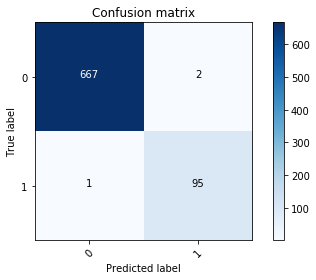

In [14]:
cnf_matrix=confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cnf_matrix , classes=[0,1])
plt.show()

Sensitivity :  0.9970104633781763
Specificity :  0.9895833333333334


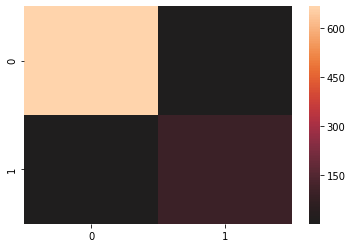

In [15]:
import seaborn as sns
sensitivity = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
print('Sensitivity : ', sensitivity )

specificity = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print('Specificity : ', specificity)

sns.heatmap(cnf_matrix, center=True)
plt.show()

In [16]:
PPV = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])
print('Positive Predictive Value : ', PPV )

Positive Predictive Value :  0.9985029940119761


In [17]:
NPV = cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[0,1])
print('Negative Predictive Value : ', NPV )

Negative Predictive Value :  0.979381443298969


In [18]:
FPR = cnf_matrix[1,0]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print('False Positive Rate : ', FPR )

False Positive Rate :  0.010416666666666666


In [19]:
FNR = cnf_matrix[0,1]/(cnf_matrix[0,1]+cnf_matrix[0,0])
print('False Negative Rate : ', FNR )

False Negative Rate :  0.0029895366218236174


In [20]:
FDR = cnf_matrix[1,0]/(cnf_matrix[1,0]+cnf_matrix[0,0])
print('False Discovery Rate : ', FDR )

False Discovery Rate :  0.0014970059880239522


In [21]:
acc= (cnf_matrix[0,0]+cnf_matrix[1,1])/(cnf_matrix[0,0]+cnf_matrix[0,1]+cnf_matrix[1,0]+cnf_matrix[1,1])
print('Accuracy : ', acc )

Accuracy :  0.996078431372549


In [22]:
Recall = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
fs= 2*((PPV*Recall)/(PPV+Recall))
print('F1 Score : ',fs)

F1 Score :  0.9977561705310397


In [23]:
sp= (cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
NLR=(FNR/sp)
print('Negative Likelihood Ratio : ', NLR )

Negative Likelihood Ratio :  0.003021005428369129


In [24]:
PLR = (Recall/FPR)
print('Positive Likelihood Ratio : ', PLR )

Positive Likelihood Ratio :  95.71300448430493


In [25]:
DOR = (PLR/NLR)
print('Diagnostic Odds Ratio : ', DOR )

Diagnostic Odds Ratio :  31682.5


In [26]:
pre = (cnf_matrix[0,0]+cnf_matrix[0,1])/(cnf_matrix[1,0]+cnf_matrix[1,1]+cnf_matrix[0,0]+cnf_matrix[0,1])
print ('Prevalence : ', pre)

Prevalence :  0.8745098039215686
